# TD 2 : Intervalle de confiance 

Christelle Gonindard et Matthias Grenié

<div class="alert alert-info">

## Objectifs

- Comprendre la notion d'intervalle de confiance
- Identifier les conditions d'application pour calculer un intervalle de confiance
- Utiliser deux méthodes, une graphique et une statistique, pour vérifier la normalité d'échantille
- Calculer et interpréter des intervalles de confiance à l'aide d'une fonction fournie

</div>

## 1. Présentation des données

Un clinicien évalue l’intensité de la dépression sur l’échelle de Hamilton qui varie de 0 (non
déprimé) à 56 (très déprimé), chez 100 patients sourant d’un Episode Dépressif Majeur (EDM).
On veut savoir si l’acupuncture améliore l’évolution de la dépression. Pour cela, 100 malades
de même état dépressif (même score de Hamilton) sont répartis en 2 groupes de 50 par tirage
au sort. Le groupe I a reçu uniquement le traitement pharmacologique et le groupe II a reçu le
traitement pharmacologique associé à de l’acupuncture.

Le jeu de données contient les variables suivantes en colonne :
- `hamilton_g1` : Les scores de Hamilton, après 8 mois de traitement pour le groupe 1 ;
- `hamilton_g2` : Les scores de Hamilton, après 8 mois de traitement pour le groupe 2 ;
- `age_g1` : l’âge des patients du groupe 1 ;
- `age_g2` : l’âge des patients du groupe 2 ;
- `poids_g1` : le poids des patients du groupe 1 ;
- `poids_g2` : le poids des patients du groupe 2 ;
- `sexe_g1` : le sexe des patients du groupe 1 (`"F"` : femme, `"H"` : homme) ;
- `sexe_g2` : le sexe des patients du groupe 2 (`"F"` : femme, `"H"` : homme) ;
- `urbanisation_g1` : le niveau d’urbanisation dans lequel vivent les patients du groupe 1 (`"A"` : rural, `"B"` : urbanisation modéré, `"C"` : fortement urbanisé) ;
- `urbanisation_g2` : le niveau d’urbanisation dans lequel vivent les patients du groupe 2 (`"A"` : rural, `"B"` : urbanisation modéré, `"C"` : fortement urbanisé).

Les données sont contenues dans le fichier texte nommé `depression.txt` qui se trouve dans le dossier `data`. Le chemin d'accès complet du fichier est donc `data/depression.txt`.

## 2. Rappel de cours : Intervalle de confiance

**Pourquoi calculer un intervalle de confiance** ?


L’estimation a pour objectif de déterminer les valeurs inconnues des paramètres de la
population (proportion, moyenne, variance) à partir des données de l’échantillon . C’est
une fonction des observations de l’échantillon dont la valeur sera utilisée en lieu et place
de la valeur vraie du paramètre. La valeur prise par le paramètre sur un échantillon donné
est appelée une estimation. L’**estimateur** est une **variable aléatoire** avec une **moyenne**
et une **variance**.

***Lorsque l’on passe d’un échantillon à un autre, l’estimateur reste le même (par exemple la moyenne) mais sa valeur varie, comme le montre l’exemple ci-dessous sur les deux échantillons de 100 vaccins, il y a deux estimations de la fréquence de vaccins non conforme : 5% pour le groupe A et 3% pour le groupe B.***

Exemple : 
Estimation de la fréquence de vaccins non-conformes dans deux échantillons différents A et B de la même série de vaccins.

<img src="Figures/TD1_2.jpeg" />


La valeur de l’estimation fluctue en fonction de l’échantillonnage. Les méthodes d’estimation
ponctuelles ne portent que sur les données d’un échantillon, or dans une population,
il est possible de choisir différents échantillons :

<img src="Figures/TD1_3.jpeg" />

Il est donc impossible d’obtenir la véritable valeur moyenne dans la population étudiée, on ne peut obtenir que des estimations sur des échantillons. De plus, l’estimation d’une moyenne à partir d’un échantillon ne présente pas grand intérêt si on n’a aucune idée de la précision de l’estimation obtenue. Aussi, on est conduit à rechercher un intervalle dans lequel il y a de bonnes chances que se trouve la vraie valeur de la moyenne. On procède alors à une estimation par intervalle de confiance à un niveau de confiance que l’on se fixe $(1-\alpha)\%$.

$$ IC_{ (1-\alpha)\%} = [\text{Borne}_{\text{inférieure}}~;~\text{Borne}_{\text{supérieure}}]$$

Les bornes de l’intervalle de confiance dépendent de l’échantillon étudié. Une infinité
d’intervalles de confiance peuvent être calculés à partir d’une infinité d’échantillons.

<img src="Figures/TD1_8.jpeg" />

**Note importante sur l'interprétation d'un intervalle de confiance** : un intervalle de confiance à $X\%$ ne signifie pas que l'intervalle va réellement contenir la vraie valeur de la moyenne $X\%$ du temps mais que si l'on prenait 100 échantillons de la même population et que l'on construisait 100 intervalles de confiance, alors $X\%$ d'entre eux contiendraient la vraie valeur de la moyenne.

## 3. Calcul de l'intervalle de confiance

**Question du TD : Quel est l’intervalle de confiance de la moyenne des scores de Hamilton du groupe 1 pour les individus de sexe féminin ?**

### 3.1 Construction du jeu de données qui permet de répondre à la question

La réponse à cette question demande en premier :
- de construire un jeu de données contenant l’ensemble des scores de Hamilton du groupe 1 pour les individus de sexe féminin.
- d'afficher la taille de l'échantillon (on peut utiliser la fonction `length()`, longueur en Anglais pour obtenir la taille de l'échantillon, **/!\\ cela s'écrit lenGTH et pas lenTGH ou autre variation /!\\**) 
- de tracer l'histogramme de ces scores
- de tracer le boxplot de ces scores

,hamilton_g1,hamilton_g2,urbanisation_g1,urbanisation_g2,age_g1,age_g2,poids_g1,poids_g2,sexe_g1,sexe_g2
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,43,25,B,B,57,48,74,93,F,H
2,29,29,A,B,37,41,95,92,H,H
3,34,18,A,A,7,30,84,86,H,H
4,39,23,A,A,37,41,104,81,H,H
5,40,24,B,A,15,30,92,74,H,F
6,41,25,B,B,45,45,85,98,H,H


[1] 43 37 38 40 37 41 43 47 46 42 44

[1] 11

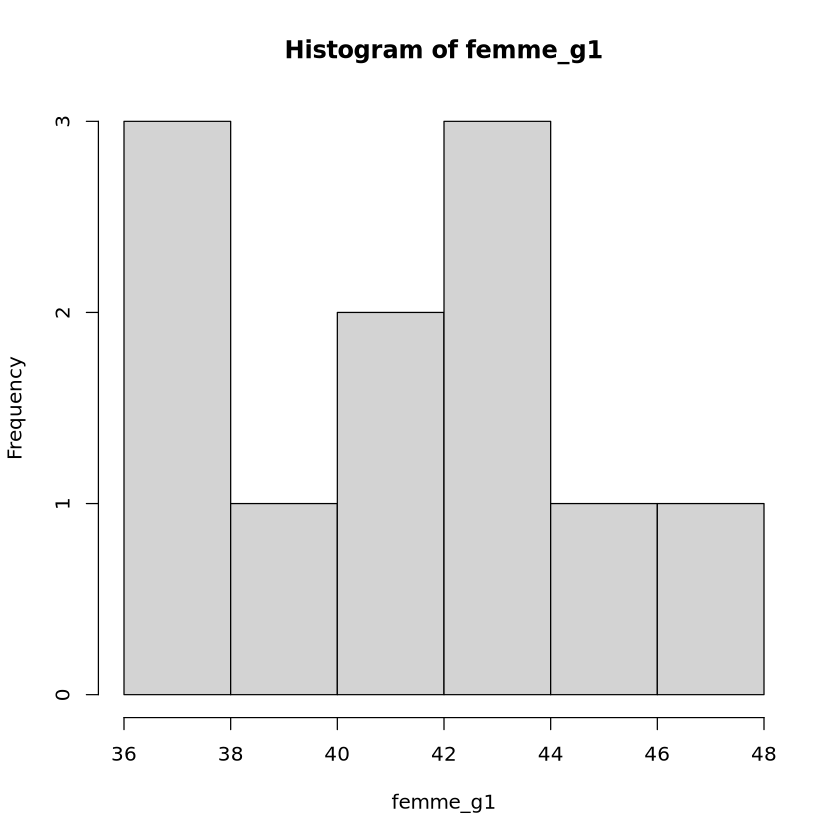

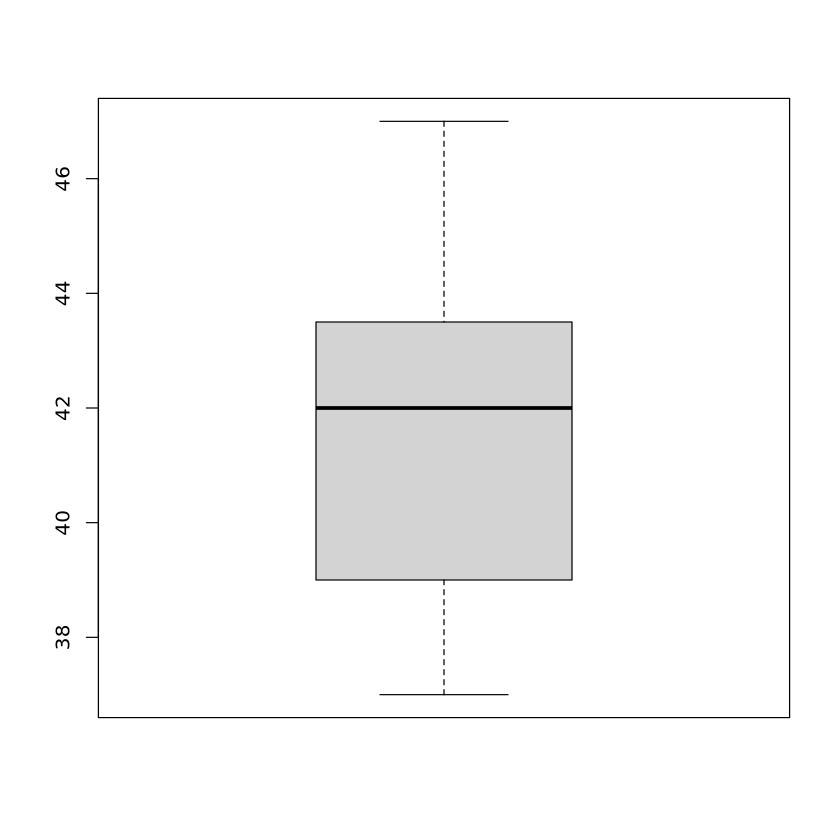

In [6]:
# Extraction des données
depression = read.table("data/depression.txt" , header = T )
head(depression)

femme_g1 = depression$hamilton_g1[depression$sexe_g1 == "F" ]
# Affichage des données extraites
femme_g1
# taille de l'échantillon
length(femme_g1)

# tracer l'histogramme 
hist(femme_g1)
# tracer du boxplot
boxplot(femme_g1)

### 3.2 Calcul des paramètres de l'échantillon

Décrire l'échantillon en calculant :
- la moyenne 
- la variance 
- l'écart type 
- afficher le résumé statistique

Commenter vos résultats

z##### 

mean

**Commentaire :**


**Avant le calcul de l’intervalle de confiance, il faut vérifier les conditions d’application :**
- Si la taille de l’échantillon est grande ($n \geq 30$) : pas de condition d’application -> on peut calculer l'intervallede confiance
- Si la taille de l’échantillon est petite ($n < 30$) : il faut que les données suivent uneloi normale

### 3.3 Vérification de la Normalité de l'échantillon

#### Méthode graphique : diagramme quantile-quantile

Une méthode graphique permet de vérifier cette normalité en traçant les quantiles de
l’échantillon en fonction des quantiles d’une loi normale. L'idée est de calculer les quantiles théoriques qu'auraient une loi normale de même moyenne et de même écart-type que les données observées, on les compare aux quantiles observés. Sous l’hypothèse de normalité les points doivent s’aligner sur une droite. Si les points sont proches d'une droite, notre distribution observée suit donc une loi normale.

Sur R, pour faire un diagramme quantile-quantile de loi Normale on doit d'abord utiliser la fonction `qqnorm()` sur le vecteur de données (pour ***q**uantile-**q**uantile of a **norm**al distribution), puis `qqline()` sur le même vecteur pour obtenir la ligne droite.

*Représentez le diagramme quantile-quantile pour les scores de Hamilton des femmes du groupe 1*

**Interprétation** :



#### Test de Normalité

Il est aussi possible d’avoir une approche basée sur un test numérique, par exemple en
calculant la variable $W$ du test de Shapiro-Wilk. Ce test statistique permet de vérifier la normalité d'une échantillon en calculant la valeur $W$ et en la comparant à une valeur théorique. Si la valeur observée est proche de la valeur théorique attendue, alors on conclura que notre distribution suit une loi Normale, si on observe un grand écart, alors on conclura que notre échantillon ne suit pas une loi normale.

Voici les hypothèses de Shapiro-Wilk :

**Hypothèse nulle (notée H0)** : la distribution de notre échantillon suit une loi normale.  
**Hypothèse alternative (notée H1)** : la distribution de notre échantillon ne suit pas une loi normale.

Pour réaliser ce test sur R, il faut utiliser la fonction `shapiro.test()` qui prend comme argument le vecteur de valeurs de l'échantillon à tester.

**Conclusion** :


### 3.4 Calcul de l'intervalle de confiance

La moyenne $m$ que nous avons calculée à partir de notre échantillon est une estimation de
la moyenne $\mu$ du score de Hamilton de la population des femmes du groupe 1. $m$ fluctue en fonction de
l’échantillon que nous analysons (= si l'on choisissait un autre échantillon, on obtiendrait une autre valeur de $m$). C’est donc une variable aléatoire se distribuant selon
une loi normale d’espérance $E[m]$ et de variance $V[m]$ si le score de Hamilton se distribue
lui même selon une loi normale avec une moyenne $\mu$ et une variance $\sigma ^2$.

Pour un échantillon de taille $n$ et pour un intervalle de confiance à un seuil $\alpha$ donnée (souvent 95%) se calcule avec la formule suivante :

$$\text{IC} = \mu \pm Z(1-\frac{\alpha}{2}) \frac{\sigma}{\sqrt{n}}$$

avec $Z(1-\frac{\alpha}{2})$ le quantile de la loi de Student d'ordre $1 - \frac{\alpha}{2}$ de la loi de Student à $n − 1$ degrés de liberté.


Il n'existe pas de fonction en **R** permettant de calculer directement un intervalle de confiance.
Comme ce calcul nécessite plusieurs opérations nous vons proposons une fonction créée pour l'occassion s'appelant `CI()` (pour ***C**onfidence **I**nterval*, intervalle de confiance en anglais) vous permettant de le faire en une simple ligne.
La fonction comme premier argument le vecteur contenant les valeurs sur lesquelles calculer l'intervalle de confiance, en deuxième argument elle prend le pourcentage de confiance associée à l'intervalle, par exemple 0.95 pour un intervalle à 95%.

**Vous devez exécuter le bloc de code ci-dessous avant de pouvoir vous servir de la fonction.  
Il faudra rajouter cette fonction au début de chaque nouveau TD pour vous en servir.**

In [ ]:
CI <- function(x, confidence){
    alpha = 1 - confidence
    mu = mean(x)
    sigma = sd(x)
    n = length(x)
    CI_inf = mu - (qt(1 - alpha/2, n-1) * sigma/sqrt(n))
    CI_sup = mu + (qt(1 - alpha/2, n-1) * sigma/sqrt(n))
    CI = c(inf = CI_inf, sup = CI_sup) 
    return(CI)
}

On peut maintenant utiliser la fonction sur notre série de données

In [ ]:
# Intervalle de confiance donné par défaut à 95%


**Interprétation** :



*Application : calculer l'intervalle de confiance à 98% du score hamilton des femmes du groupe 1*

**Interprétation** :



<div class="alert alert-success">

## En résumé

Dans cette séance :

- Nous avons rappelé la théorie des intervalles de confiance
- Nous avons rappelé les conditions d'application à vérifier avant de les calculer : si $n \geq 30$ pas de conditions à vérifier, sinon il faut vérifier la normalité de l'échantillon
- Nous avons appris à utiliser deux méthodes pour vérifier la normalié d'un échantillon : (1) la méthode graphique avec le diagramme quantile-quantile avec `qqnorm()` et `qqline()`, (2) la méthode statistique avec le test de Shapiro-Wilk en utilisant `shapiro.test()`
- Nous avons appris à interpréter les résultats d'un test statistique en utilisant les p-values et à conclure sur les hypothèses
- Nous avons vu comment calculer un intervalle de confiance avec la fonction particulière `CI()` et comment l'interpréter

</div>

## 4. Exercices d'application

### 4.1 Exercices d'entraînement (à faire en cours si possible)

#### Exercice 1

1. Calculer l’intervalle de confiance du score de Hamilton des hommes puis des femmes pour le groupe 1, en vérifiant les conditions d’application (au seuil 95%)
2. Calculer l’intervalle de confiance du score de Hamilton des hommes puis des femmes pour le groupe 2, en vérifiant ces conditions d’application (au seuil 95%)
3. Qu’en concluez-vous ?

Rapidement : 
- Groupe 2 moins dépressif aussi bien chez les hommes que les femmes, ce qui laisserait penser que l'accuponcture a un effet bénéfique
- Dans groupe 1 : homme moins dépressif que les femmes, dans le groupe 2 niveau dépression équilibré (attention aux faibles échantillonages qui agrandit les bornes de l'IC. 


#### Exercice 2

1. Extraire un sous jeu de données que l’on nommera U1 et qui contient les score de Hamilton du groupe 1 dans les zones faiblement urbanisées (c’est-à-dire `urbanisation_g1 == "A"`)
2. Calculer l’intervalle de confiance de U1, en vérifiant les conditions d’application (au seuil 95%)
3. Extraire un sous jeu de données que l’on nommera U2 et qui contient les score de Hamilton du groupe 1 dans les zones urbanisées (c’est-à-dire `urbanisation_g1 == "B"`)
4. Calculer l’intervalle de confiance de U2, en vérifiant les conditions d’application (au seuil 95%)
5. Qu’en concluez-vous ?

### 4.2 Exercices supplémentaires

Ces exercices vous permettent de réviser les deux premiers TD. 

#### Exercice A

1. Extraire tableau de données que l'on nommera U3 et qui contient les informations relatives au groupe 2 dans les zones  urbanisées (c’est-à-dire `urbanisation_g2 == "B"`).
2. Retirer de ce jeu de donnée l'individu le plus âgé.
3. A partir de ce tableau U3, calculez la moyenne, la médiane, les quartiles et l'écart type du poids.
4. Extraire un sous-jeu de données que l’on nommera U4 et qui contient les scores de Hamilton du groupe 2 dans les zones  urbanisées (c’est-à-dire `urbanisation_g2 == "A"`).
5. Retirer de ce jeu de donner la femme la plus légère.
6. A partir du tableau U4, calculez la moyenne, les quantiles et la variance de l'âge.
7. Pour U3 et U4, calculez les intervalles de confiances du score Hamilton, en vérifiant les conditions d’application (au seuil 95%)
8. Qu’en concluez-vous ?


#### Exercice B

1. Qu'elle est l'âge maximum et minimum de la femme appartenant au groupe 1 dans les zones  urbanisées et dont le poids est strictement inférieur au deuxième quartile.
2. Même question pour le groupe 2 dans les zones faiblement urbanisées et dont le poids le poids et supérieur ou égale au 8ème décile (un décile est un quantile à 10%, on peut le calculer avec la fonction `quantile(x, 0.8)`.
3. Représenter graphiquement l'âge en fonction du poids pour les individus du groupe 2.
4. Représenter graphiquement l'âge en fonction du poids pour les hommes du groupe 1.
5. Représenter graphiquement les boxplots représentant les âges dans les groupes 1 et 2 en séparant les hommes et les femmes.
6. Représenter graphiquement les boxplots représentant les poids dans les groupes 1 et 2 en séparant les hommes et les femmes.

Pensez à commenter vos graphiques

#### Exercice C

On souhaite ici calculer des intervalles à 98%, le risque $\alpha$ pour le test est de 1%

1. reprenez les exercices 1 et 2 en calculant l'intervalle de confiance de l'âge.
2. reprenez les exercices 1 et 2 en calculant l'intervalle de confiance du poids. 

**I. Intervalles de confiances sur les données âges**

**II. Intervalles de confiances sur les données poids**

#### Exercice D

Exécuter le bloc de code ci-dessous pour créer un nouveau tableau `depression_long` à partir du fichier `depression_long.txt` dans le dossier `data/`. **Vous n'avez pas à le comprendre**.
Il s'agit des même données que celles du fichier `depression.txt` mais présentées sous un autre format.

Ce nouveau tableau contient les colonnes suivantes :
- `groupe`
- `hamilton`
- `urbanisation`
- `age`
- `poids`
- `sexe`

En utilisant ce nouveau tableau, pour l'âge des hommes et des femmes :

1. Calculer la moyenne, la médiane, l'écart type et les quartiles de ces 2 groupes.
2. Représenter graphiquement ces 2 groupes.
3. calculez l'intervalle de confiance de ces 2 groupes à 95% et 98%.
4. Qu’en concluez-vous ?

En utilisant ce nouveau tableau, pour l'âge des 2 groupes d'urbanisation :

1. Calculer la moyenne, la médiane, l'écart type et les quartiles de ces 2 groupes.
2. Représenter graphiquement ces 2 groupes.
3. calculez l'intervalle de confiance de ces 2 groupes à 95% et 98%.
4. Qu’en concluez-vous ?


En utilisant ce nouveau tableau, pour le score Hamilton des hommes et des femmes :

1. Calculer la moyenne, la médiane, l'écart type et les quartiles de ces 2 groupes.
2. Représenter graphiquement ces 2 groupes.
3. calculez l'intervalle de confiance de ces 2 groupes à 95% et 98%.
4. Qu’en concluez-vous ?

En utilisant ce nouveau tableau, pour le score Hamilton des 2 groupes d'urbanisation :

1. Calculer la moyenne, la médiane, l'écart type et les quartiles de ces 2 groupes.
2. Représenter graphiquement ces 2 groupes.
3. calculez l'intervalle de confiance de ces 2 groupes à 95% et 98%.
4. Qu’en concluez-vous ?


En utilisant ce nouveau tableau, pour le poids des hommes et des femmes : 
1. Calculer la moyenne, la médiane, l'écart type et les quartiles de ces 2 groupes.
2. Représenter graphiquement ces 2 groupes.
3. calculez l'intervalle de confiance de ces 2 groupes à 95% et 98%.
4. Qu’en concluez-vous ?

En utilisant ce nouveau tableau, pour le poids des 2 groupes d'urbanisation :

1. Calculer la moyenne, la médiane, l'écart type et les quartiles de ces 2 groupes.
2. Représenter graphiquement ces 2 groupes.
3. calculez l'intervalle de confiance de ces 2 groupes à 95% et 98%.
4. Qu’en concluez-vous ?

#### Exercice E

1. Représenter graphiquement les boxplots représentants pour les groupes 1 et 2 :

- a) les scores de Hamilton en séparant les hommes et les femmes.
- b) les âges en séparant les hommes et les femmes.
- c) les poids en séparant les hommes et les femmes.


**sur un seul graphique**

2. Représenter graphiquement le score Hamilton en fonction de l'âge pour les 2 groupes. Vous devez utiliser la fonction `plot()` qui permet de représenter un nuage de point et prend comme deux premiers arguments les données de l'axe des abscisses et celles de l'axe des ordonnées. Vous pouvez leur donner une couleur différente avec l'argument `col=`.

**sur un seul graphique** (je vous conseille d'utiliser le tableau `depression_long`)